# AI - ENABLED PERSONALIZED EDUCATION SYSTEM

## 1.Introduction:

I used the libraries like: Pandas, Numpy, Matplotlib, Seaborn.

1.Pandas: It is a powerful library for data manipulation and analysis.

2.NumPy: It is Essential for numerical computations and handling arrays and also provides mathematical functions and tools for working with large datasets.

3.Matplotlib: A versatile plotting library that enables you to create various types of visualizations, such as line plots, scatter plots, histograms, and more.

4.Seaborn: Built on top of Matplotlib, Seaborn simplifies statistical data visualization

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

#Importing the necessary libraries
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,expon,gamma,poisson

In [3]:
df = pd.read_csv("AI_Enabled_PES_Dataset.csv")
print(data)

     Age  StudyHoursPerWeek   GPA  MotivationLevel  StressLevel  \
0     24                 37  2.93                8            3   
1     21                 13  3.68                9            4   
2     28                 33  3.02                8            4   
3     25                 30  3.48                8            2   
4     22                 39  3.81                9            1   
..   ...                ...   ...              ...          ...   
395   27                  7  3.47                9            4   
396   19                 27  3.38                7            2   
397   27                 22  3.86                8            1   
398   18                 39  3.44                9            4   
399   25                 19  3.33                9            4   

     AttentionSpan  FeedbackScore    LearningStyle       Strength  \
0                7              8      Kinesthetic    Application   
1                7              7      Kinesthetic  Compr

### DATA ANALYSIS

In [4]:
df.head() #read first 5 rows

,Age,StudyHoursPerWeek,GPA,MotivationLevel,StressLevel,AttentionSpan,FeedbackScore,LearningStyle,Strength,Weakness,Preference,Performance
0,24,37,2.93,8,3,7,8,Kinesthetic,Application,Focus,Classroom Learning,Average
1,21,13,3.68,9,4,7,7,Kinesthetic,Comprehension,Focus,Online Learning,Average
2,28,33,3.02,8,4,9,7,Auditory,Evaluation,Focus,Online Learning,Average
3,25,30,3.48,8,2,8,7,Reading/Writing,Comprehension,Attention,Solo Study,Good
4,22,39,3.81,9,1,9,8,Kinesthetic,Analysis,Focus,Online Learning,Excellent


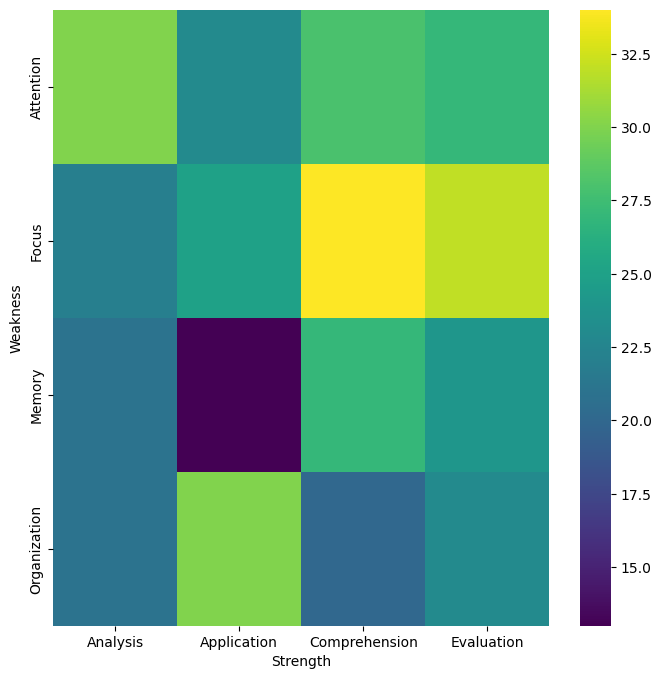

In [5]:
# Strength vs Weakness

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weakness'].value_counts()
    for x_label, grp in df.groupby('Strength')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Strength')
_ = plt.ylabel('Weakness')

<Axes: xlabel='Performance'>

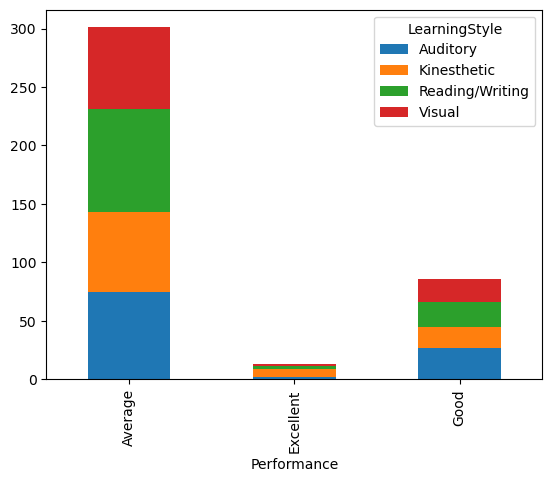

In [6]:
#Learning Style by Performance

df.groupby(['Performance', 'LearningStyle']).size().unstack().plot(kind='bar', stacked=True)

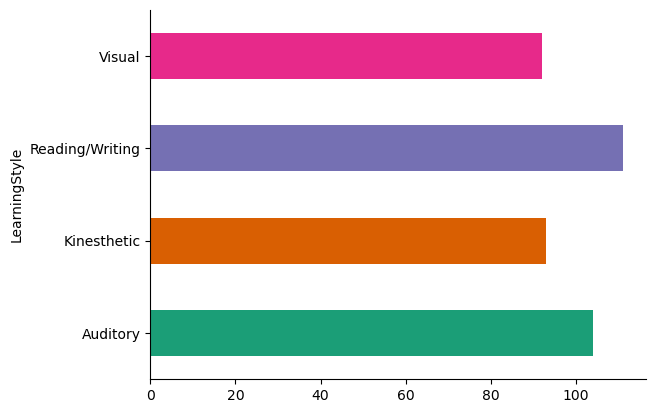

In [7]:
# LearningStyle

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('LearningStyle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# last 5 rows
df.tail()

,Age,StudyHoursPerWeek,GPA,MotivationLevel,StressLevel,AttentionSpan,FeedbackScore,LearningStyle,Strength,Weakness,Preference,Performance
395,27,7,3.47,9,4,6,8,Kinesthetic,Comprehension,Attention,Solo Study,Average
396,19,27,3.38,7,2,8,7,Kinesthetic,Comprehension,Attention,Online Learning,Average
397,27,22,3.86,8,1,9,7,Auditory,Evaluation,Attention,Classroom Learning,Good
398,18,39,3.44,9,4,8,9,Kinesthetic,Comprehension,Attention,Classroom Learning,Good
399,25,19,3.33,9,4,9,9,Reading/Writing,Analysis,Organization,Group Study,Good


In [9]:
# Generate summary statistics for numerical columns
df.describe()

,Age,StudyHoursPerWeek,GPA,MotivationLevel,StressLevel,AttentionSpan,FeedbackScore
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,23.452500,22.445000,3.425725,7.450000,2.51000,7.457500,7.945000
std,3.573467,10.179441,0.332716,1.131681,1.12831,1.120863,0.805355
min,18.000000,5.000000,2.800000,6.000000,1.00000,6.000000,7.000000
25%,20.000000,14.000000,3.170000,6.000000,2.00000,6.000000,7.000000
50%,24.000000,23.000000,3.440000,7.000000,2.00000,7.000000,8.000000
75%,26.000000,31.000000,3.700000,8.000000,4.00000,8.000000,9.000000
max,29.000000,39.000000,4.000000,9.000000,4.00000,9.000000,9.000000


In [10]:
# Display basic information about the DataFrame , including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                400 non-null    int64  
 1   StudyHoursPerWeek  400 non-null    int64  
 2   GPA                400 non-null    float64
 3   MotivationLevel    400 non-null    int64  
 4   StressLevel        400 non-null    int64  
 5   AttentionSpan      400 non-null    int64  
 6   FeedbackScore      400 non-null    int64  
 7   LearningStyle      400 non-null    object 
 8   Strength           400 non-null    object 
 9   Weakness           400 non-null    object 
 10  Preference         400 non-null    object 
 11  Performance        400 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 37.6+ KB


In [11]:
# Count the number of unique values in each column
df.nunique()

Age                   12
StudyHoursPerWeek     35
GPA                  115
MotivationLevel        4
StressLevel            4
AttentionSpan          4
FeedbackScore          3
LearningStyle          4
Strength               4
Weakness               4
Preference             4
Performance            3
dtype: int64

In [12]:
#Col null values
df.isnull().sum()

Age                  0
StudyHoursPerWeek    0
GPA                  0
MotivationLevel      0
StressLevel          0
AttentionSpan        0
FeedbackScore        0
LearningStyle        0
Strength             0
Weakness             0
Preference           0
Performance          0
dtype: int64

#Recursive Feature Elimination (RFE):

Recursive Feature Elimination (RFE) is a feature selection method that recursively removes the least important features to identify the best performing subset of features for a model. It's commonly used in machine learning to enhance the performance of models by eliminating irrelevant or less significant features.
To implement RFE for an AI-Enabled Personalized Education System (PES) using the dataset columns you provided, you would typically follow these steps in Python using libraries like pandas for data manipulation and sklearn for machine learning.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Load the refined dataset
file_path = 'AI_Enabled_PES_Dataset.csv'
data = pd.read_csv(file_path)

# Preprocessing the data
# Convert 'Performance' to a binary target variable for simplicity (1 for Good/Excellent, 0 for Average)
data['Performance'] = data['Performance'].map({'Good': 1, 'Average': 0, 'Excellent': 1})

# Encode categorical features
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Define the feature set and target variable
X = data.drop('Performance', axis=1)
y = data['Performance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model and RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)

# Create a pipeline with RFE and logistic regression
pipeline = Pipeline([
    ('feature_selection', rfe),
    ('classification', model)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'feature_selection__n_features_to_select': [5, 6, 7],
    'classification__C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model with the best parameters
y_pred = best_estimator.predict(X_test)
accuracy = best_estimator.score(X_test, y_test)
print(f"Best Parameters: {best_params}")
print(f"\nModel Accuracy with Best Parameters: {accuracy * 100:.2f}%")

# Extract the selected features and their rankings
rfe_best = best_estimator.named_steps['feature_selection']
selected_features = X.columns[rfe_best.support_]
feature_ranking = rfe_best.ranking_

print("\nSelected Features:")
print(selected_features)

print("\nFeature Ranking:")
print(feature_ranking)


Best Parameters: {'classification__C': 10, 'feature_selection__n_features_to_select': 7}

Model Accuracy with Best Parameters: 90.00%

Selected Features:
Index(['StudyHoursPerWeek', 'GPA', 'MotivationLevel', 'StressLevel',
       'Strength', 'Weakness', 'Preference'],
      dtype='object')

Feature Ranking:
[5 1 1 1 1 4 2 3 1 1 1]


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load the refined dataset
file_path = 'AI_Enabled_PES_Dataset.csv'
data = pd.read_csv(file_path)

# Preprocessing the data
data['Performance'] = data['Performance'].map({'Good': 1, 'Average': 0, 'Excellent': 1})
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

X = data.drop('Performance', axis=1)
y = data['Performance']

X_selected = X[['StudyHoursPerWeek', 'GPA', 'MotivationLevel', 'StressLevel', 'Strength', 'Weakness', 'Preference']]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


### 1.Logistic Regression

Logistic Regression Accuracy: 90.00%


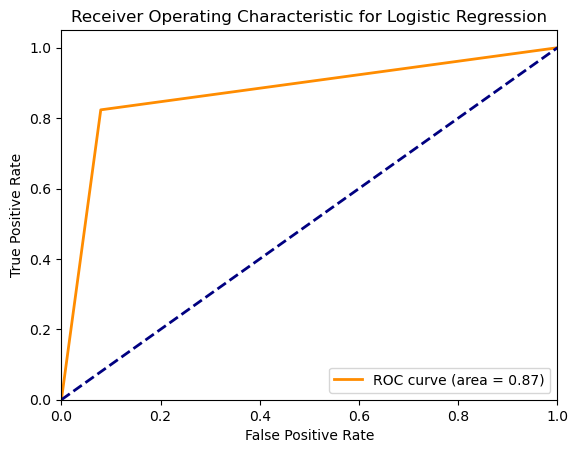

In [15]:
log_reg = LogisticRegression(C=10, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### 2.K-Nearest Neighbour (KNN)

KNN Accuracy: 80.00%


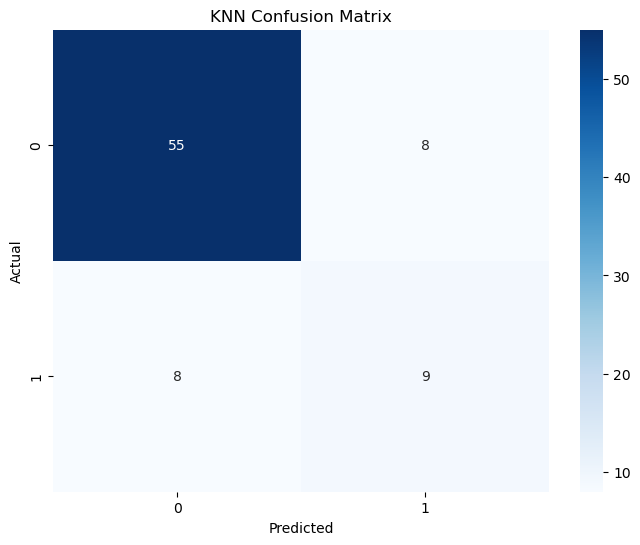

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 3.Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 97.50%


C:\Users\mukes\AppData\Local\Temp\ipykernel_2844\1634969815.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob, shade=True, color="r")


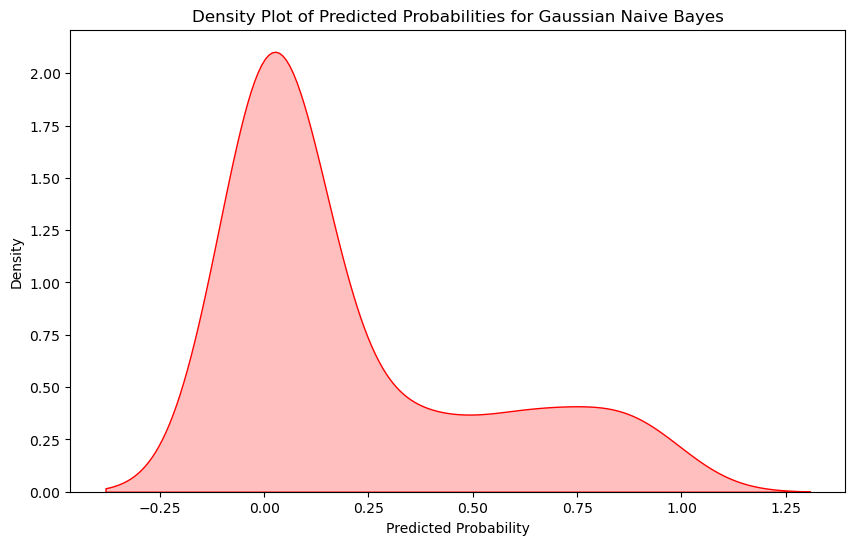

In [17]:
file_path = 'AI_Enabled_PES_Dataset.csv'
data = pd.read_csv(file_path)

# Preprocessing the data
data['Performance'] = data['Performance'].map({'Good': 1, 'Average': 0, 'Excellent': 1})
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

X = data.drop('Performance', axis=1)
y = data['Performance']

X_selected = X[['StudyHoursPerWeek', 'GPA', 'MotivationLevel', 'StressLevel', 'Strength', 'Weakness', 'Preference']]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naive Bayes Accuracy: {accuracy * 100:.2f}%")
y_prob = gnb.predict_proba(X_test)[:, 1]

# Plot density plot:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_prob, shade=True, color="r")
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Probabilities for Gaussian Naive Bayes')
plt.show()


### 4.Bernoulli Naive Bayes

Bernoulli Naive Bayes Accuracy: 78.75%


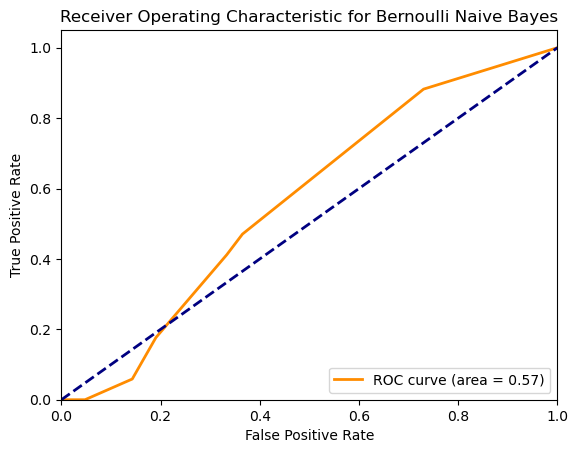

In [18]:


# Load the refined dataset
file_path = 'AI_Enabled_PES_Dataset.csv'
data = pd.read_csv(file_path)

# Preprocessing the data
data['Performance'] = data['Performance'].map({'Good': 1, 'Average': 0, 'Excellent': 1})
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

X = data.drop('Performance', axis=1)
y = data['Performance']

X_selected = X[['StudyHoursPerWeek', 'GPA', 'MotivationLevel', 'StressLevel', 'Strength', 'Weakness', 'Preference']]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy * 100:.2f}%")

# Calculate probabilities
y_prob = bnb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### 5.Multilayer Perceptron

MLP Accuracy: 82.50%


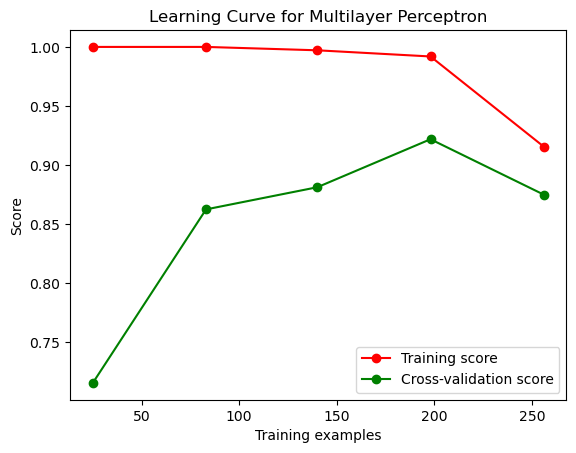

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy * 100:.2f}%")

# Plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for Multilayer Perceptron')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


### 6.Random Forest Classifier


Random Forest Accuracy: 98.75%


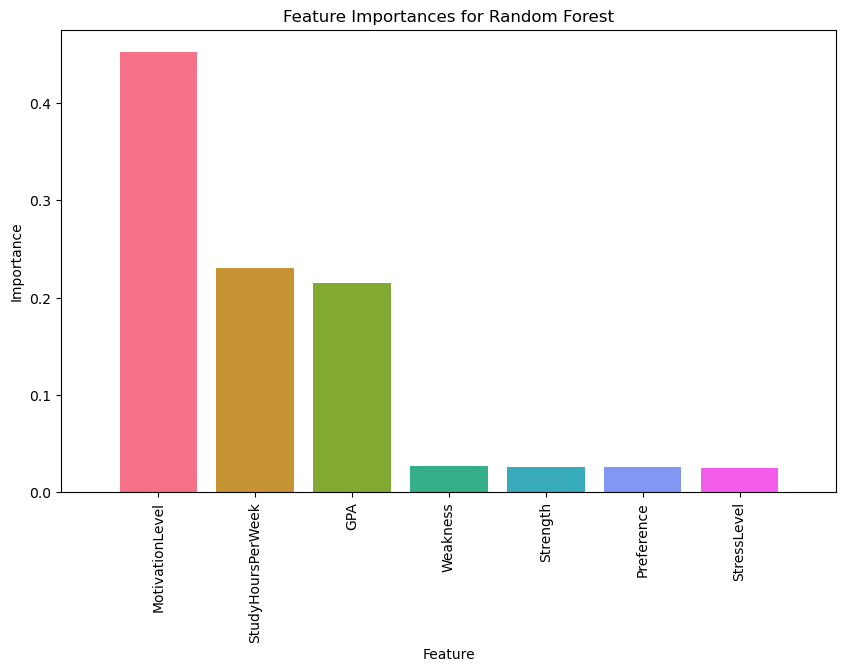

In [20]:

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Plot feature importances with different colors
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
colors = sns.color_palette("husl", len(indices))  # Use seaborn's color palette for diverse colors

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Random Forest")
plt.bar(range(X_selected.shape[1]), importances[indices], color=colors, align="center")
plt.xticks(range(X_selected.shape[1]), X_selected.columns[indices], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


### 7.Support Vector Machine (SVM)

SVM Accuracy: 88.75%


C:\Users\mukes\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


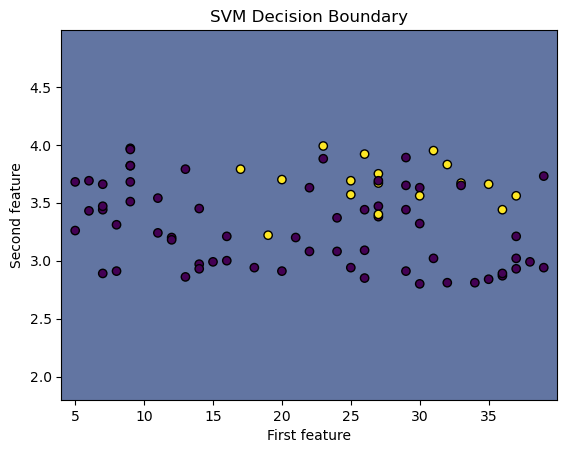

In [21]:
svm = SVC(C=10, kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary (2D example, using first two features)
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

svm_2d = SVC(C=10, kernel='linear')
svm_2d.fit(X_train_2d, y_train)
y_pred_2d = svm_2d.predict(X_test_2d)

plt.figure()
x_min, x_max = X_test_2d.iloc[:, 0].min() - 1, X_test_2d.iloc[:, 0].max() + 1
y_min, y_max = X_test_2d.iloc[:, 1].min() - 1, X_test_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=y_test, edgecolors='k', marker='o')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('SVM Decision Boundary')
plt.show()


### 8.Gradient Boosting

Gradient Boosting Accuracy: 98.75%


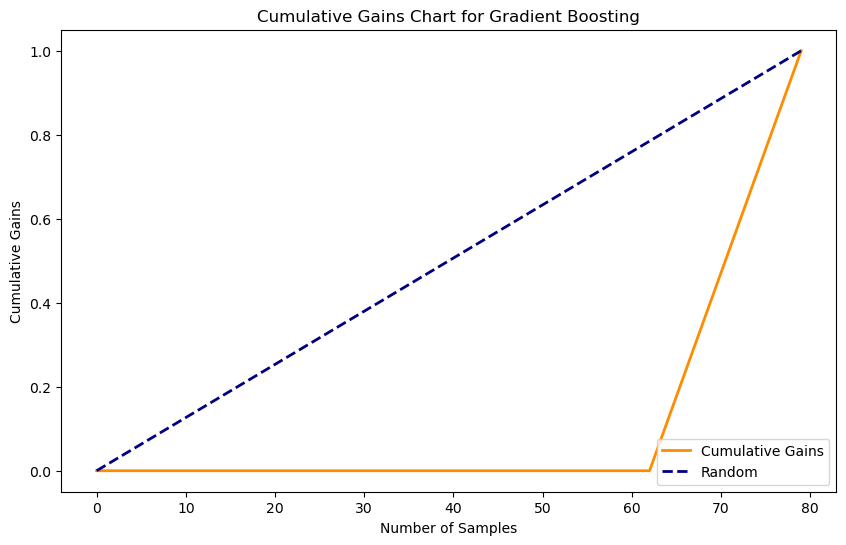

In [22]:
file_path = 'AI_Enabled_PES_Dataset.csv'
data = pd.read_csv(file_path)

# Preprocessing the data
data['Performance'] = data['Performance'].map({'Good': 1, 'Average': 0, 'Excellent': 1})
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])
X = data.drop('Performance', axis=1)
y = data['Performance']
X_selected = X[['StudyHoursPerWeek', 'GPA', 'MotivationLevel', 'StressLevel', 'Strength', 'Weakness', 'Preference']]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model with adjusted parameters to reduce accuracy
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.2, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")
y_prob = gb.predict_proba(X_test)[:, 1]
sorted_indices = np.argsort(y_prob)
sorted_y = y_test.iloc[sorted_indices]
sorted_prob = y_prob[sorted_indices]
cumulative_gains = np.cumsum(sorted_y) / np.sum(sorted_y)
random_gains = np.linspace(0, 1, len(cumulative_gains))

# Plot cumulative gains chart
plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_gains)), cumulative_gains, color='darkorange', lw=2, label='Cumulative Gains')
plt.plot(range(len(random_gains)), random_gains, color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Chart for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


### 9.AdaBoost

AdaBoost Accuracy: 98.75%


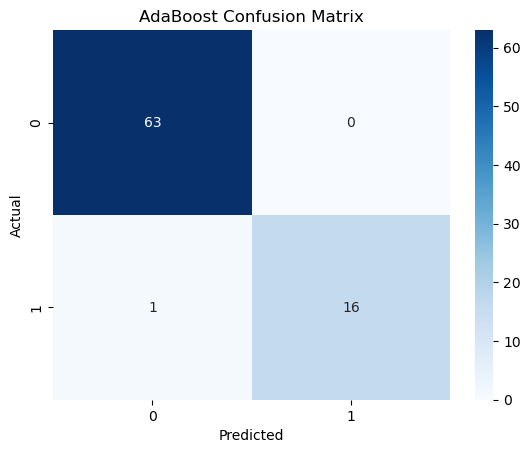

In [23]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 10.Hierarchical Clustering

C:\Users\mukes\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


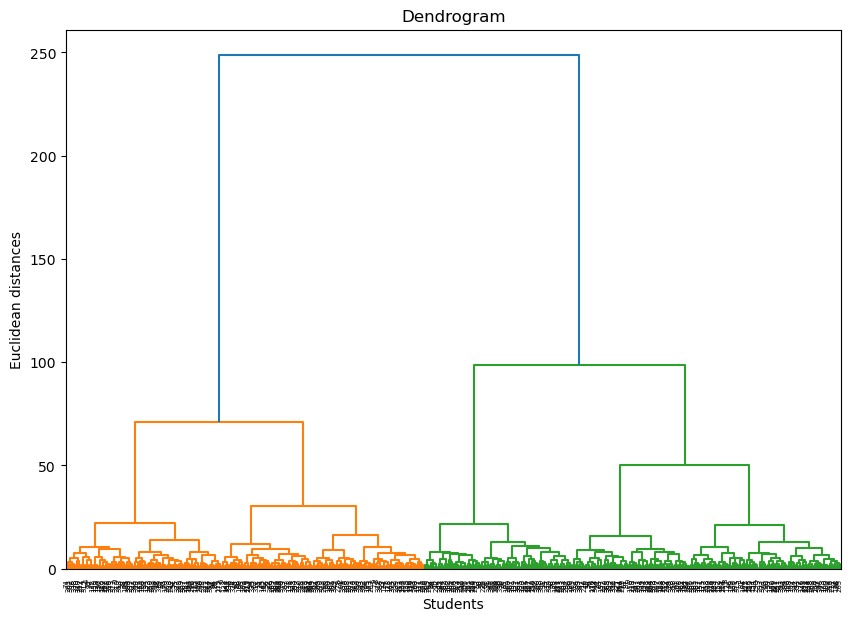

Cluster assignment for the first 10 data points: [1 0 1 1 1 1 1 0 0 0]


In [24]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_selected)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_selected, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()

print("Cluster assignment for the first 10 data points:", y_hc[:10])
